# Exploration des sorties de MAELIA

Première analyse avec deux sorties issues d'un mode de test de MAELIA.  
Les deux modélisations sont comparables, elles ne diffèrent que par l'utilisation d'irrigation dans un cas.  

In [5]:
log_MAELIA_acIri = '/Users/g.taburet/Gama_Workspace/MAELIA_1.4.27_GAMA_2025-06/models/main/log/terrainTest_mais_tousSols_irr_organique_ApresAjoutIrrigationITK/'
log_MAELIA_ssIri = '/Users/g.taburet/Gama_Workspace/MAELIA_1.4.27_GAMA_2025-06/models/main/log/terrainTest_mais_tousSols_irr_organique_AvantAjoutIrrigationITK/'

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

## Rendement

In [17]:
filename = 'suiviOTParParcelle.csv'

df_with_iri = pd.read_csv(log_MAELIA_acIri + filename,sep=';')
df_without_iri = pd.read_csv(log_MAELIA_ssIri + filename,sep=';')

rendement_with_iri = df_with_iri["RECOLTE_rendement[t/ha]"].dropna()
rendement_without_iri = df_without_iri["RECOLTE_rendement[t/ha]"].dropna()
annees_1 = range(2020, 2030)

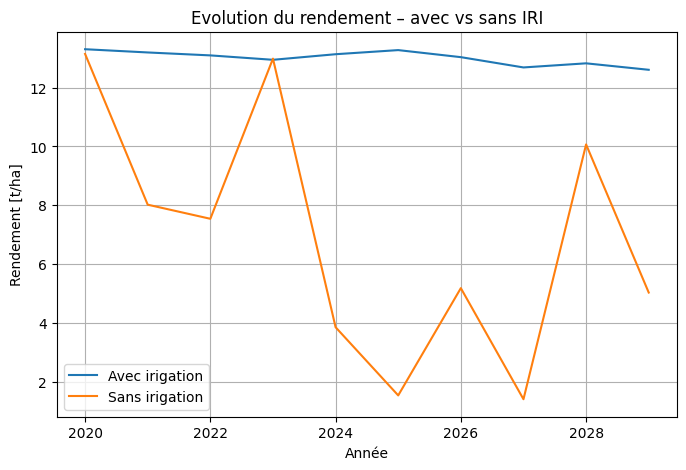

In [ ]:
plt.figure(figsize=(8, 5))

plt.plot(
    annees_1,
    rendement_with_iri,
    label="Avec irigation"
)
plt.plot(
    annees_1,
    rendement_without_iri,
    label="Sans irigation"
)

plt.ylabel("Rendement [t/ha]")
plt.xlabel("Année")
plt.title("Evolution du rendement – avec vs sans IRI")
plt.legend()
plt.grid(True)

plt.show()

## Lixiviation

In [9]:
filename_CN = 'sorties_CN.csv'

df_with_iri = pd.read_csv(log_MAELIA_acIri + filename_CN,sep=';')
df_without_iri = pd.read_csv(log_MAELIA_ssIri + filename_CN,sep=';')

lixiviation_with_iri = df_with_iri[["N_lixivie[kgN/ha]", "annee"]].dropna()
lixiviation_without_iri = df_without_iri[["N_lixivie[kgN/ha]", "annee"]].dropna()
annees = range(2020, 2031)

In [10]:
lixiviation_with_iri.groupby("annee").sum()

,N_lixivie[kgN/ha]
annee,
2020,1.48
2021,23.93
2022,20.15
2023,1.24
2024,2.64
2025,0.49
2026,1.53
2027,2.21
2028,1.12


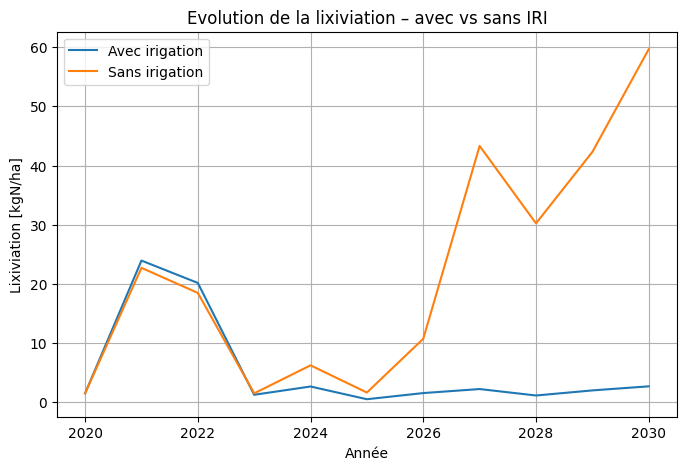

In [11]:
plt.figure(figsize=(8, 5))

plt.plot(
    annees,
    lixiviation_with_iri.groupby("annee").sum(),
    label="Avec irigation"
)
plt.plot(
    annees,
    lixiviation_without_iri.groupby("annee").sum(),
    label="Sans irigation"
)

plt.ylabel("Lixiviation [kgN/ha]")
plt.xlabel("Année")
plt.title("Evolution de la lixiviation – avec vs sans IRI")
plt.legend()
plt.grid(True)

plt.show()

## Emission GES

In [12]:
filename_GES = 'sorties_GES.csv'

df_with_iri = pd.read_csv(log_MAELIA_acIri + filename_GES, sep=';')
df_without_iri = pd.read_csv(log_MAELIA_ssIri + filename_GES, sep=';')

ges_with_iri = df_with_iri[["bilan_net_GES[kg_eqCO2/ha]", "annee"]].dropna()
ges_without_iri = df_without_iri[["bilan_net_GES[kg_eqCO2/ha]", "annee"]].dropna()

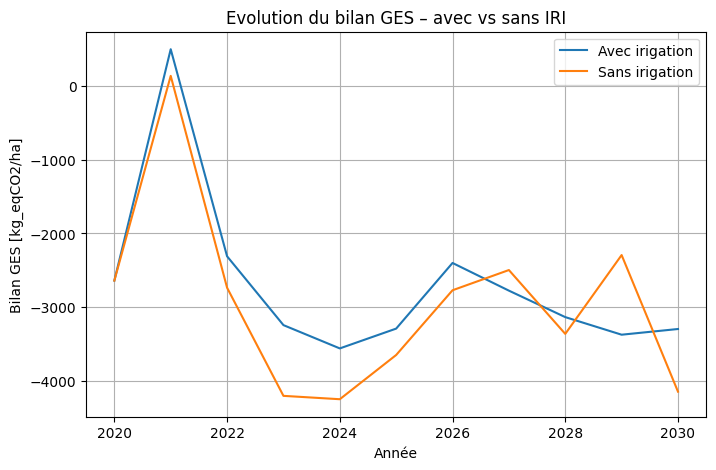

In [13]:
plt.figure(figsize=(8, 5))

plt.plot(
    annees,
    ges_with_iri.groupby("annee").sum(),
    label="Avec irigation"
)
plt.plot(
    annees,
    ges_without_iri.groupby("annee").sum(),
    label="Sans irigation"
)

plt.ylabel("Bilan GES [kg_eqCO2/ha]")
plt.xlabel("Année")
plt.title("Evolution du bilan GES – avec vs sans IRI")
plt.legend()
plt.grid(True)

plt.show()

## Evolution de l'irrigation dans le temps

In [14]:
filename_EAU = 'sorties_eau.csv'

df_with_iri = pd.read_csv(log_MAELIA_acIri + filename_EAU, sep=';')
df_without_iri = pd.read_csv(log_MAELIA_ssIri + filename_EAU, sep=';')

eau_with_iri = df_with_iri[["irrigation[mm]", "annee"]].dropna()
eau_without_iri = df_without_iri[["irrigation[mm]", "annee"]].dropna()

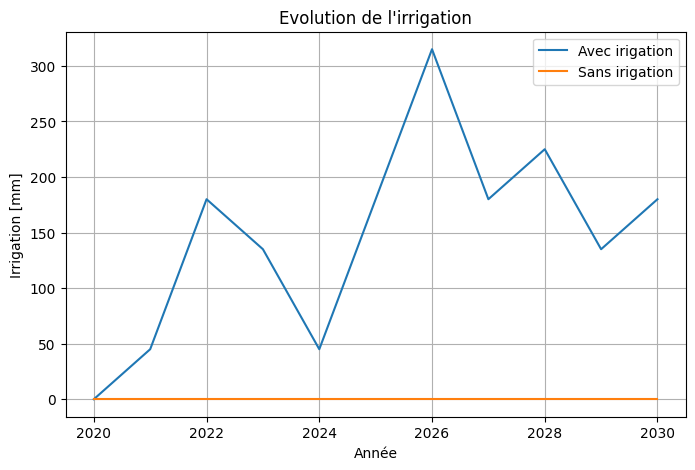

In [15]:
plt.figure(figsize=(8, 5))

plt.plot(
    annees,
    eau_with_iri.groupby("annee").sum(),
    label="Avec irigation"
)
plt.plot(
    annees,
    eau_without_iri.groupby("annee").sum(),
    label="Sans irigation"
)

plt.ylabel("Irrigation [mm]")
plt.xlabel("Année")
plt.title("Evolution de l'irrigation")
plt.legend()
plt.grid(True)

plt.show()

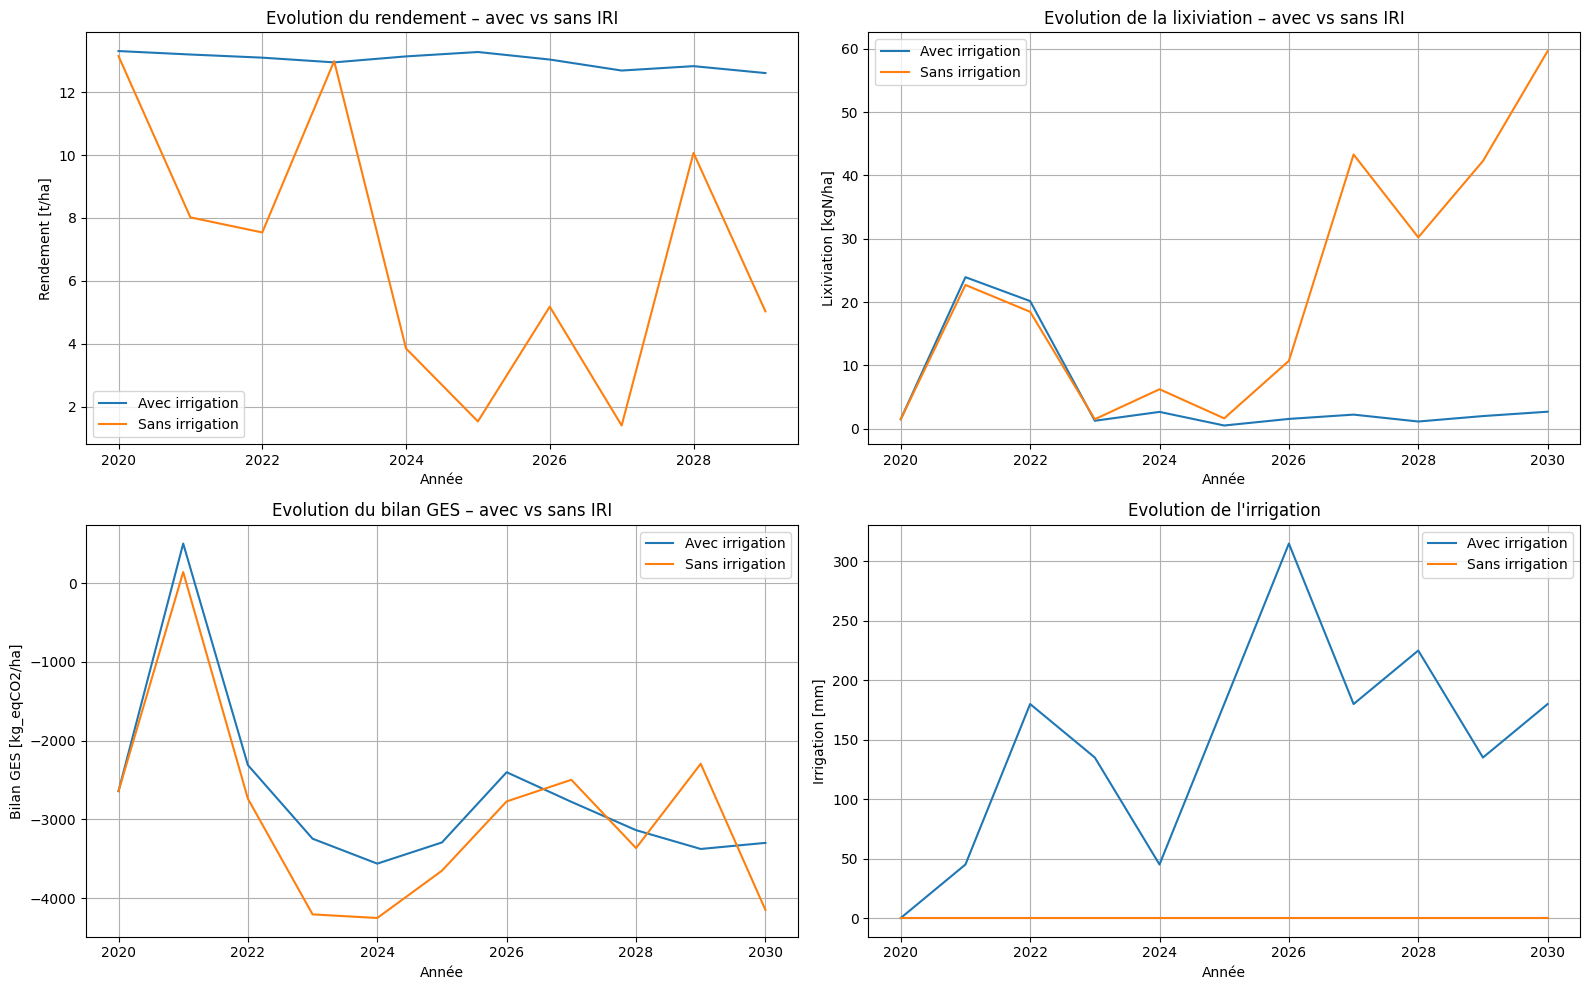

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

ax = axs[0, 0]

ax.plot(
    annees_1,
    rendement_with_iri,
    label="Avec irrigation"
)
ax.plot(
    annees_1,
    rendement_without_iri,
    label="Sans irrigation"
)

ax.set_ylabel("Rendement [t/ha]")
ax.set_xlabel("Année")
ax.set_title("Evolution du rendement – avec vs sans IRI")
ax.legend()
ax.grid(True)


ax = axs[0, 1]
ax.plot(
    annees,
    lixiviation_with_iri.groupby("annee").sum(),
    label="Avec irrigation"
)
ax.plot(
    annees,
    lixiviation_without_iri.groupby("annee").sum(),
    label="Sans irrigation"
)
ax.set_ylabel("Lixiviation [kgN/ha]")
ax.set_xlabel("Année")
ax.set_title("Evolution de la lixiviation – avec vs sans IRI")
ax.legend()
ax.grid(True)

ax = axs[1, 0]
ax.plot(
    annees,
    ges_with_iri.groupby("annee").sum(),
    label="Avec irrigation"
)
ax.plot(
    annees,
    ges_without_iri.groupby("annee").sum(),
    label="Sans irrigation"
)
ax.set_ylabel("Bilan GES [kg_eqCO2/ha]")
ax.set_xlabel("Année")
ax.set_title("Evolution du bilan GES – avec vs sans IRI")
ax.legend()
ax.grid(True)

ax = axs[1, 1]
ax.plot(
    annees,
    eau_with_iri.groupby("annee").sum(),
    label="Avec irrigation"
)
ax.plot(
    annees,
    eau_without_iri.groupby("annee").sum(),
    label="Sans irrigation"
)
ax.set_ylabel("Irrigation [mm]")
ax.set_xlabel("Année")
ax.set_title("Evolution de l'irrigation")
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()